In [1]:
import ramCOH.functions as f
import ramCOH.processing as ram
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout()

In [2]:
ol_file = ".\olivine\PI089-04-01_2022_03_01_15_29_33_532nm_Edge_100�_x50_VIS_LWD_H150_1800 (450-850nm)_5s x 2_01.txt"
x, y = np.genfromtxt(ol_file, unpack=True)

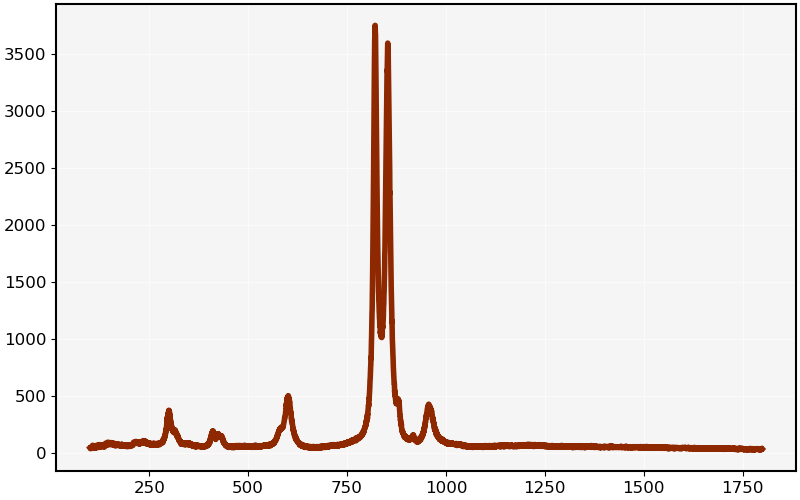

In [3]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.show()

In [4]:
birs = np.array(
    [
        [100, 140],
        [370, 380],
        [470, 515],
        [680, 740],
        [1020, 4000]
    ]
)

In [8]:

olivine = ram.olivine(x, y)
olivine.baselineCorrect(birs, smooth=1e-7)
olivine.deconvolve(noise_threshold=1.3, fit_window=4, peak_prominence=3)



c:\data\dropbox\python\packages\ramcoh\ramCOH\functions.py:525: UserWarning: Noise increased from last iteration, using previous result
  warnings.warn("Noise increased from last iteration, using previous result")


In [9]:
paramDict = [
    {"center": i, "amplitude": j, "width": k, "shape": l, "baselevel": m}
    for _, (i, j, k, l, m) in enumerate(zip(*olivine.deconvolution_parameters))
]

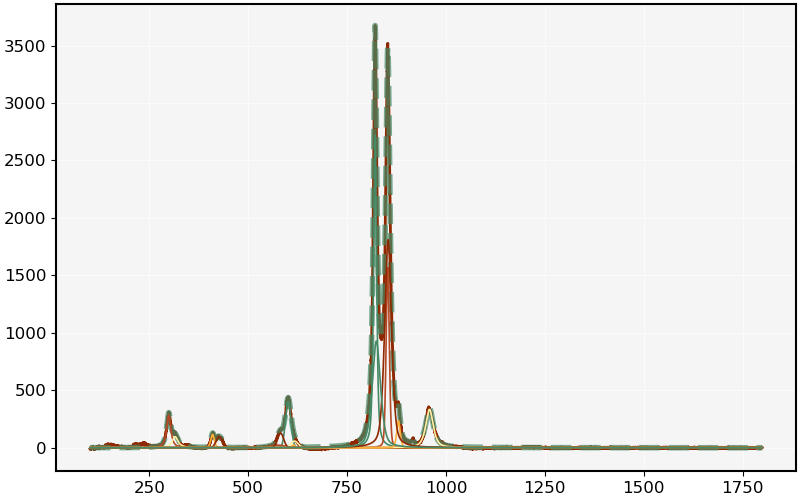

In [10]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(olivine.x, olivine.intensities["BC"], linewidth=2)
plt.plot(olivine.x, f.sum_GaussLorenz(olivine.x, *olivine.deconvolution_parameters), alpha=0.7, linestyle="dashed")
# plt.plot(x, spline)
for curve in paramDict:
    plt.plot(olivine.x, f.GaussLorentz(olivine.x, **curve), linewidth=1.2)